In [ ]:
# Initialize Otter
import otter
grader = otter.Notebook("HW4.ipynb")

# Homework 4

**Due Date: Friday November 21 @ 11:59 pm** 

**Regrade Request Due Date: Friday December 5 @ 11:50pm** 

**Objective:** This assignment will give you experience in using cartopy, doing linear regression and group-by summarization, as well as producing multi-panel matplotlib plots

**Full score**: 50 points

## **Instructions:**
    
### Submitting to GradeScope

1. Make sure your code fully runs before uploading to Gradescope. The best way to do this is by restarting your kernel, running through each of your cells, and checking for errors.

2. When you're sure that your code fully runs, save your notebook file. 

3. Download your notebook file to your local computer by right clicking the file in the left panel. 

4. Go to the Homework 4 Assignment in Gradescope and upload your file. You can resubmit as many times as you want before the deadline.

### Working in your Notebook

1. Read the instructions to each question and its subsections carefully, and make sure to write your answers in the *specified area*. Typically, you will see a comment indicating where you should put your solutions. You are welcome to insert however many blocks of code below the starting block to complete your task

2. Sometimes starter code are provided to you. In general, *unless stated otherwise*, you are welcomed to (and sometimes required to!) modify the content of the starter code.

3. **Make sure you follow the coding etiquette, since part of your grade is based on it.** As a reminder, you should (i) use meaningful variable names, (ii) organize your codes into logical blocks, and (iii) document the intent of your code. On average, we expects you to have a line of comment every 5 - 15 lines of code.

### Data files

- This assignment requires you to load data from the provided data file(s). You should make sure that the location of each data file relative to your notebook is **exactly the same** as on the GitHub repo. For example, if the data files are contained in a folder named "data" at the same level as the notebook on GitHub, it should also be placed in a "data" folder at the same level as the notebook on JupyterHub.

- It is sufficient to include only the Jupyter notebook when you submit your homework to gradescope.

### Honor Code

- Complete the assignment by writing and executing text and code cells as specified. For this assignment, do not use any features of Python that have not yet been discussed in the lessons or class sessions.

- Please keep in mind our regrade request and dropped homework grading policy. Late assignments are not accepted. Review the syllabus for details. 

- You can acknowledge and describe any assistance you've received on this assignment in the specified cell of the HW1 notebook, whether that was from an instructor, classmate (either directly or on Ed Discussion), and/or online resources. Alternatively, if you prefer, you may acknowledge assistance at the relevant point(s) in your code using a Python comment (#). Don't forget that you can receive extra credit from answering at least one question on Ed Discussion!

*Acknowledge assistance here or in comments above your code:*





<!-- BEGIN QUESTION -->



In [ ]:
# Import your packages here


<!-- END QUESTION -->

## Question 1 (15 points)

ANGAEA is an amazing source of oceanographic data. The database has compiled data from over hundreds of cruises, accumulating to over 419,000 datasets with over 25 billion individual measurements and observations. _Citation_: https://doi.org/10.1038/s41597-023-02269-x.

For this exercise we will be reading and mapping measured surface salinity and temperature data from a 2016 transatlantic cruise from South America to Europe (COLIBRI cruise 35MJ20150607). Source of ship data: https://doi.pangaea.de/10.1594/PANGAEA.865996.

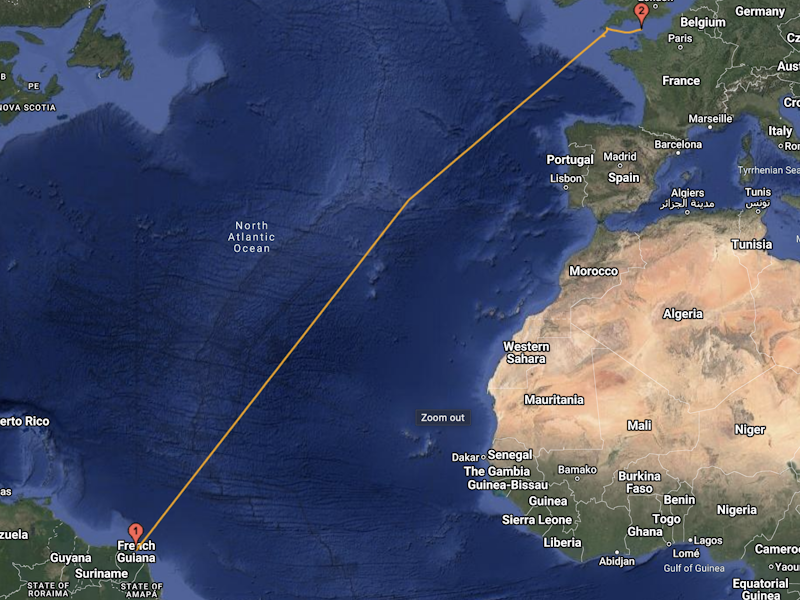P

<!-- BEGIN QUESTION -->

### Part a. (5 points)

The cruise data is contained in a file named `35MJ20150607_CO2_underway_SOCATv4.tab` under the data folder. Unlike the typical case of csv file the entries in this file is *tab separated*. Moreover, the file also include metadata on top that needs to be skipped.

By directly opening the file in JupyterHub (just double-click it), determine the number of lines that need to be skipped. Note that Jupyter notebook display the line number of the text on the left by default.

Then, use `pd.read_csv()` to read the file and store the result in a variable. You'll need to specify `sep="\t"` to tell pandas that the data are separated by tabs and supply the number of row to skip in the `skiprows` argument. *Display the result* (cis `display()` and check that the first row of data indeed correspond to the first line of data

In [ ]:
# Your answers here


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Part b. (10 points)

Use `matplotlib` and `cartopy` to plot the trajectory (longitude and latitude) of the cruise, and use color to indicate the salinity (`Sal`) meaured by the cruise (this can be achieved using `ax.scatter()`). Your plot should include the following elements:

> a. The map projection should be set to PlateCarree. And limit the extent of the latitude and longitude to around the range of the cruise
>
> b. Add coastline, ocean, land, and borders to the map. Choose appropriate color for these
>
> c. Add latitude and longitude gridlines, and pick a color that make them visible
>
> d. Also include a color bar, with appropriate label 

In addition, make sure your plot following the usual guideline:
1. Concise, descriptive title for each figure/subplot
2. Axis labels with units (when possible)
3. Appropriate axis limits (minimum and maximum)
4. Appropriate tick resolution
5. Legend when plotting multiple data series
6. Appropriate font size (a good range is 12-15)

In [ ]:
# Your answers here


<!-- END QUESTION -->

## Question 2 (15 points)

Threats from climate change often impact devloping countries most harshly. This is particularly true for nations at risk from sea level rise. Much of Pakistan is very low elevation, and the coastal city of Karachi is on average only 8 meters above sea level. Through a combination of sea level rise and river delta subsidence, some researchers estimate that Karachi could be underwater in the next several decades
<br>[Source](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC7517073/).

In this exercise, we will analyze sea level data curated by the [Permanent Service for Mean Sea Level](https://psmsl.org/data/obtaining/stations/204.php). Data was collected intermittently from Karachi during 1910-2016. We will calculate the rate of sea level rise at Karachi.

Assuming that the `Pakistan_sea_level_psmsl.txt` file is placed in the data folder as expected, the following code will load the data into a pandas DataFrame and plot how sea level varies with time.

In [ ]:
sea_level = pd.read_csv(
    "data/Pakistan_sea_level_psmsl.txt", 
    sep=";", header=None, skiprows=22, na_values=[-99999]
)
sea_level.columns = ["fractional year", "depth (mm)", "number of missing days", "quality flag"]

year_month = sea_level["fractional year"]
depth_mm = sea_level["depth (mm)"]

display(sea_level)

In [ ]:
fig = plt.figure(figsize=(8, 3))
ax = fig.add_subplot()

ax.plot(year_month, depth_mm, label='Original Data', linestyle="", marker='.')

ax.set_xlabel("Time (year)", size=14)
ax.set_ylabel("Sea Level (mm)", size=14)

ax.set_title("Sea level at Karachi station Pakistan from 1910-2016", size=16)

plt.show(fig)

<!-- BEGIN QUESTION -->

### Part a. (10 points)

Perform a linear regression on the data (_Hint_: you'll first need to remove the NA values, otherwise `scipy` will complain). Then, in the markdown cells below, answer the following question:

> i. On average, is the sea level rising? If so, how fast? (_Hint_: look at the slope of your regression)
>
> ii. What is the coefficient of determination $R^2$ between time and sea level? Is the value of $R^2$ is consistent with the pattern seen on the plot?

_Type your answer here, replacing this text._

In [ ]:
# Your answers here


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Part b. (5 points)

Modify the plot created by the starter code to include the best fitted line. Make sure your best fitted line is distinct from the data, and remember to include a legend.

In [ ]:
# Paste the start code from above
# And add the best fitted line


<!-- END QUESTION -->

## Question 3 (18 points)

The Puget Sound Zooplankton Monitoring Program (PSZMP) collects zooplankton samples at sites across the Salish Sea twice a month to better understand how climate and environmental control their biomass and community composition. In this question we will work with a subset of their data, collected in 2022 and narrowed to the class Copepoda. The full dataset can be found in [this github folder](https://github.com/nanoos-pnw/obis-pszmp/tree/main/aligned_csvs). Our subset is named `PSZMP_occurence_2022.csv` and is placed inside the data folder.

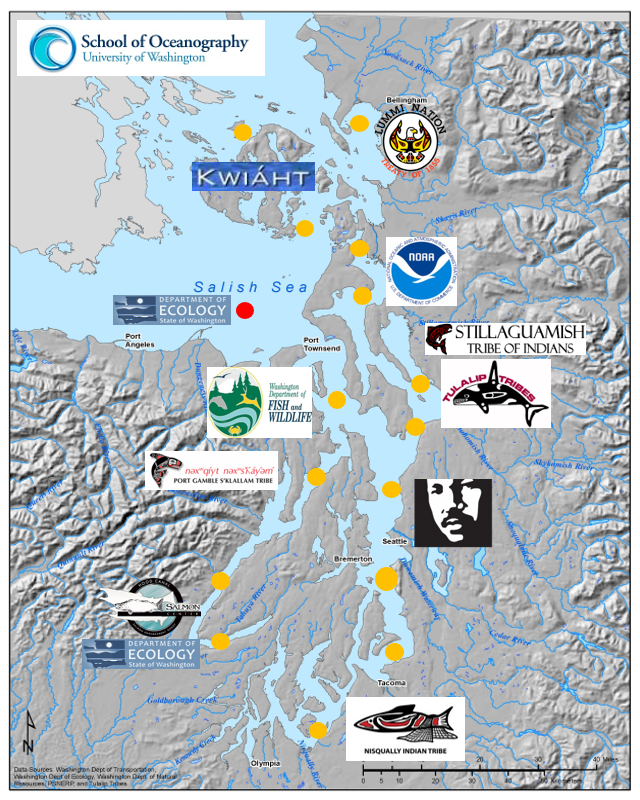

<!-- BEGIN QUESTION -->

### Part a. (5 points)

Load the occurrence table from the csv file. Subset it further to include only samples at the adult life stage, and which the sex is either male or female. Display your subsetted dataframe

In [ ]:
# Your answers here


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### part b. (5 points)

For each unique combination of sex and family, find the counts of adults. Present the result as a pandas DataFrame and display it via `display()`.

In [ ]:
# Your answers here


<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Part c. (8 points)

Create a two panel (top and bottom) figure, where the top panel is a bar chart of male counts by family, and the bottom panel is a bar chart of female counts by family. Use the same x and y axes for both panels, and make sure each of them is labeled. To make sure that family names are legible, rotate the x-axis labels by 90°. In addition, follow the usual plotting guideline:

1. Concise, descriptive title for each figure/subplot
2. Axis labels with units (when possible)
3. Appropriate axis limits (minimum and maximum)
4. Appropriate tick resolution
5. Legend when plotting multiple data series
6. Appropriate font size (a good range is 12-15)

_Hint_: you may need to use the `y` argument of `fig.supxlabel()` to bring the position of the x-axis label down to a location not overlapping with the x-axis tick labels

In [ ]:
# Your answers here


<!-- END QUESTION -->

## Check that your codes run without errors (2 points)

Please check that your code runs without error when the notebook is executed from top to bottom. You may find the "Restart the kernel and run all cells" option (selectable using the `⏩` icon) useful.